In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv(r'C:\Users\kgaut\Documents\PROJECTS\LOAN PREDICTION\train.csv')

In [4]:
test = pd.read_csv(r'C:\Users\kgaut\Documents\PROJECTS\LOAN PREDICTION\test.csv')

In [5]:
train.head(), test.head()

(    Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           N  
 2 

In [8]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 no

(None, None)

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [13]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0])

In [14]:
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0])

In [16]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0])

In [18]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0])

In [19]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].dropna().mode().values[0])

In [20]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode().values[0])

In [21]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])

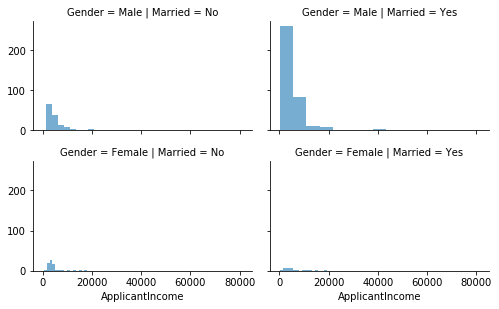

In [22]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Married', size = 2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = 0.6, bins = 15)

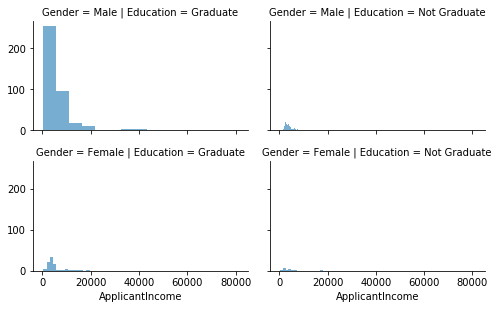

In [24]:
grid = sns.FacetGrid(train, row = 'Gender', col = 'Education', size = 2.2, aspect =1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = 0.6, bins = 15)

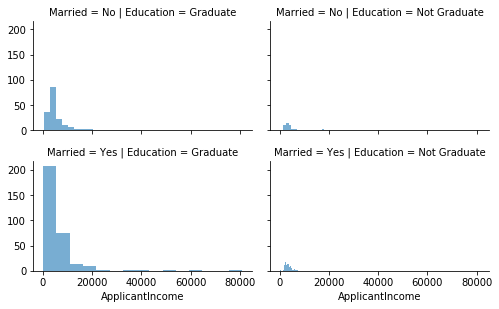

In [26]:
grid = sns.FacetGrid(train, row = 'Married', col = 'Education', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = 0.6, bins=15)

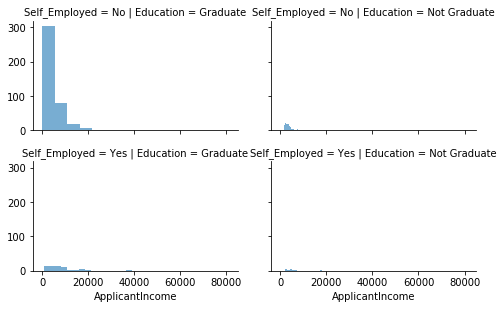

In [27]:
grid = sns.FacetGrid(train, row = 'Self_Employed', col='Education', size=2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.6, bins=15)

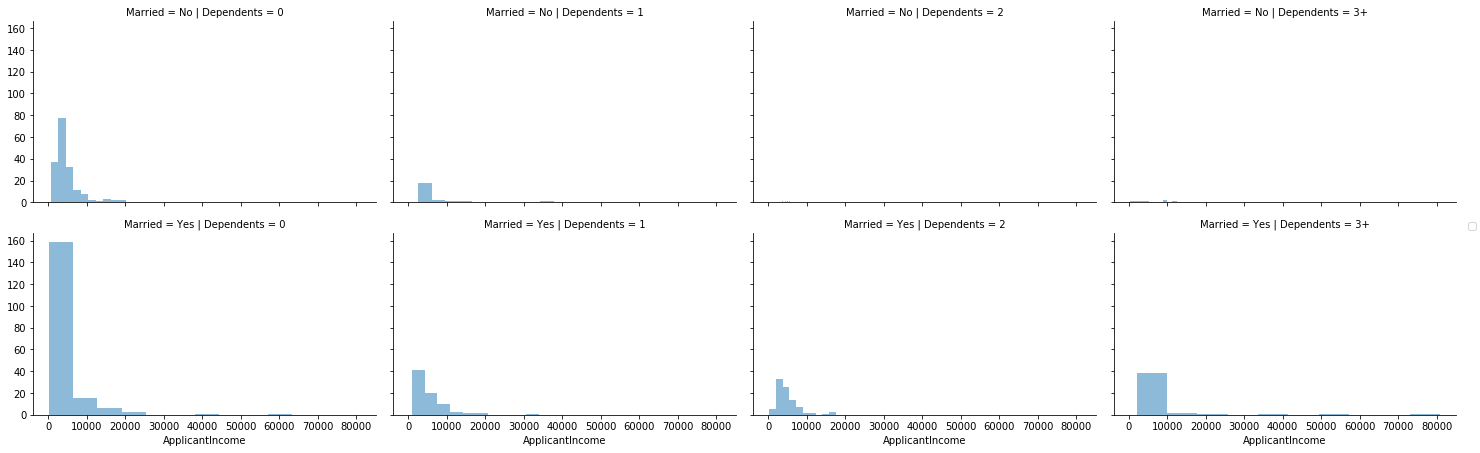

In [32]:

grid = sns.FacetGrid(train, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()


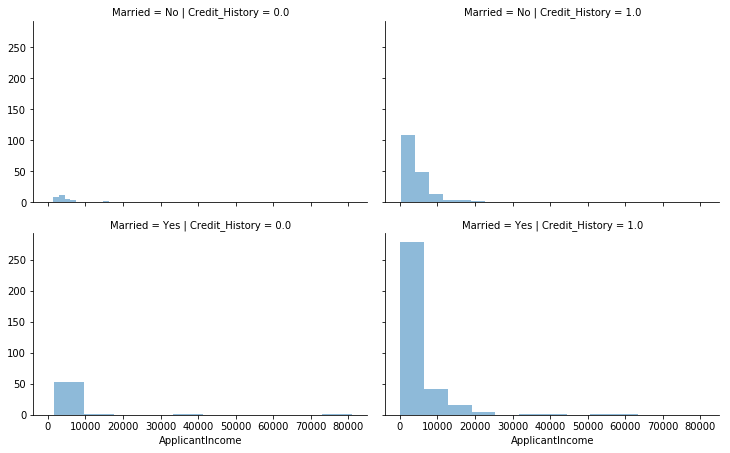

In [33]:
grid = sns.FacetGrid(train, row = 'Married', col = 'Credit_History', size = 3.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = 0.5, bins=10)

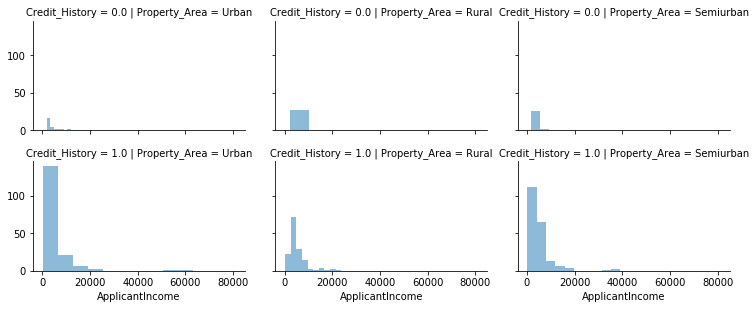

In [34]:
grid = sns.FacetGrid(train, row = 'Credit_History', col = 'Property_Area', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = 0.5, bins=10)

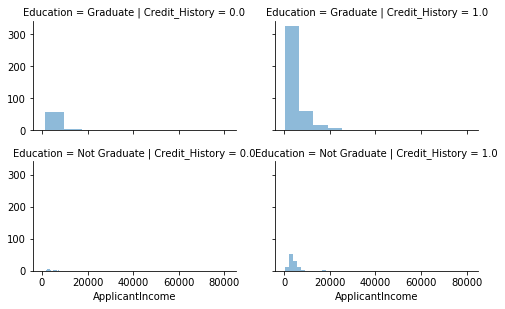

In [35]:
grid = sns.FacetGrid(train, row = 'Education', col = 'Credit_History', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha = 0.5, bins=10)

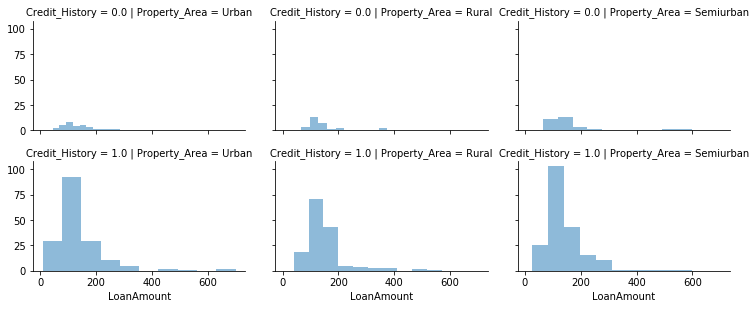

In [37]:
grid = sns.FacetGrid(train, row = 'Credit_History', col = 'Property_Area', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'LoanAmount', alpha = 0.5, bins=10)

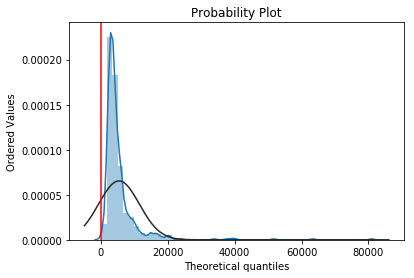

In [38]:
sns.distplot(train['ApplicantIncome'], fit=norm)
fig = plt.figure


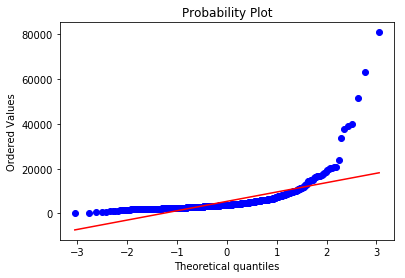

In [39]:
resd = stats.probplot(train['ApplicantIncome'], plot=plt)

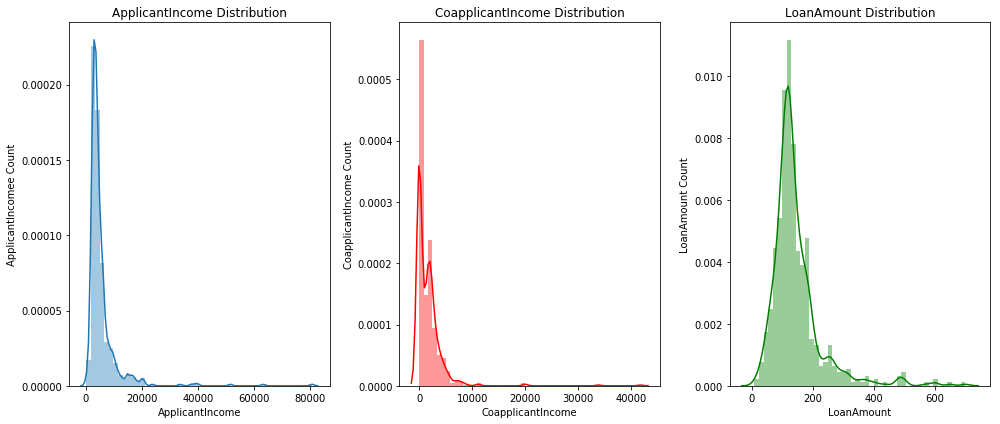

<Figure size 432x288 with 0 Axes>

In [42]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(train['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(train['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(train['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()




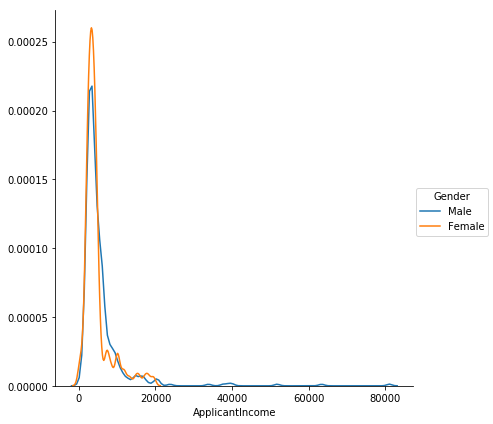

In [43]:

sns.FacetGrid(train, hue="Gender", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

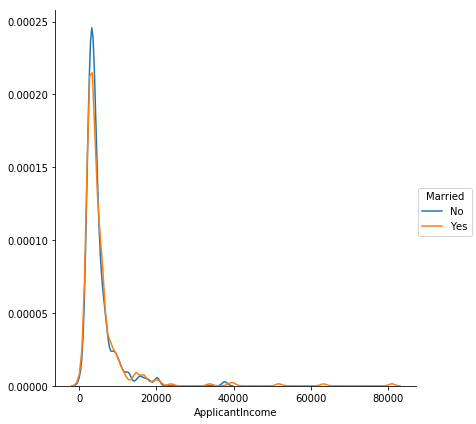

In [45]:

sns.FacetGrid(train, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

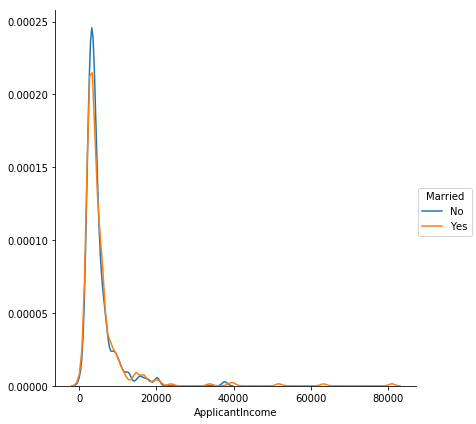

In [47]:
sns.FacetGrid(train, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

In [48]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5,1,'Regression line')

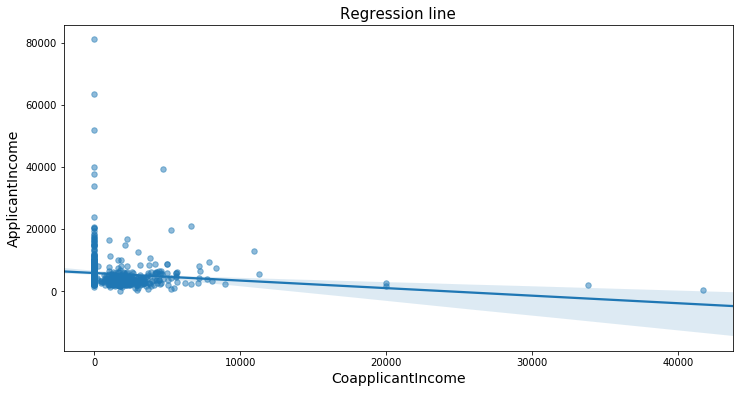

In [49]:

plt.figure(figsize=(12,6))
sns.regplot(x= 'CoapplicantIncome', y = 'ApplicantIncome', data = train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel('CoapplicantIncome', fontsize = 14)
plt.ylabel('ApplicantIncome', fontsize = 14)
plt.title('Regression line', fontsize = 15)

Text(0.5,1,'Regression Line')

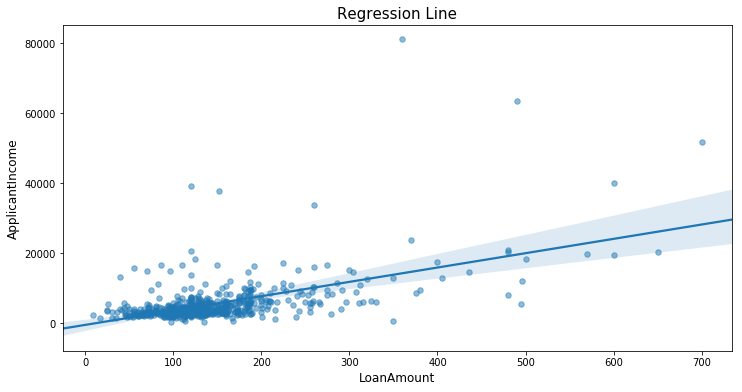

In [51]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x='LoanAmount', y='ApplicantIncome', data=train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel('LoanAmount', fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title('Regression Line', fontsize=15)

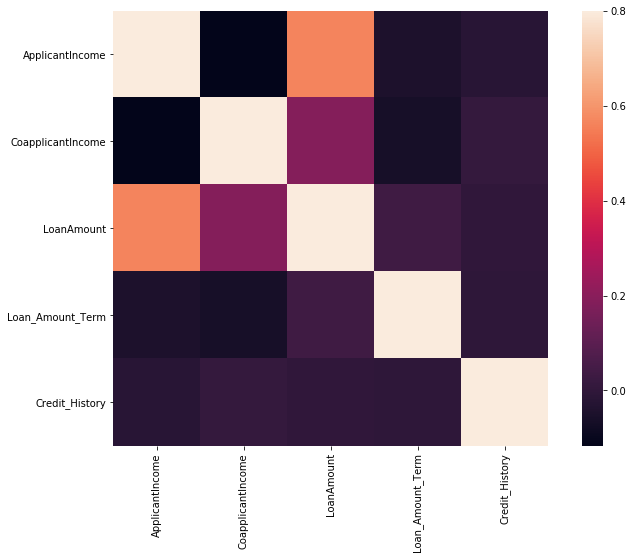

In [52]:
correlation = train.corr()
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(correlation, vmax = 0.8, square = True)

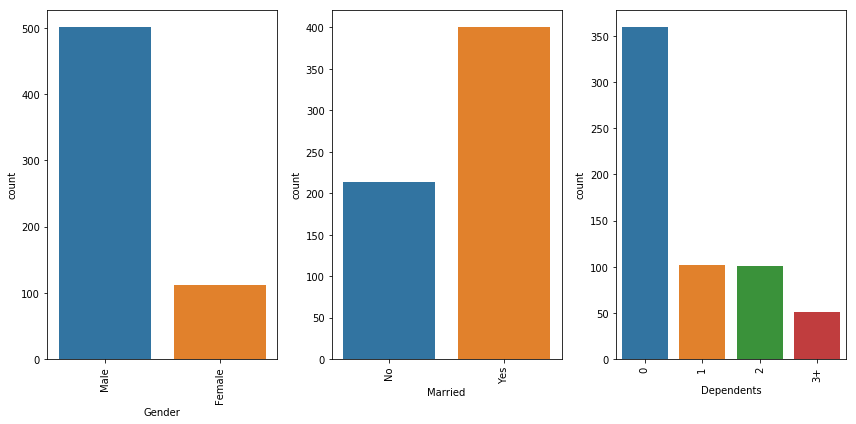

<Figure size 432x288 with 0 Axes>

In [53]:
fig, axes = plt.subplots(ncols=3, figsize=(12,6))

g = sns.countplot(train['Gender'], ax= axes[0])
plt.setp(g.get_xticklabels(), rotation =90)

g = sns.countplot(train['Married'], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation =90)

g = sns.countplot(train['Dependents'], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation =90)

plt.tight_layout()
plt.show()
plt.gcf().clear()


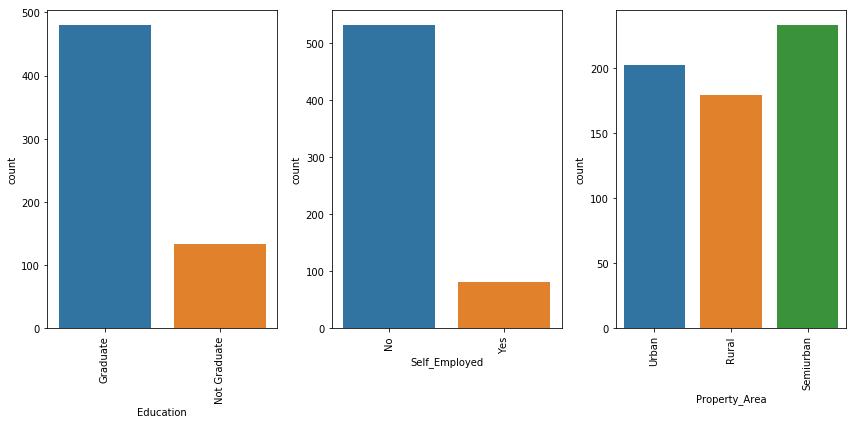

<Figure size 432x288 with 0 Axes>

In [54]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(train["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(train["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(train["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [55]:
train[['Gender', 'ApplicantIncome']].groupby(['Gender'], as_index=False).mean().sort_values(by='Gender')

,Gender,ApplicantIncome
0,Female,4643.473214
1,Male,5573.017928


In [56]:
train[['Married', 'ApplicantIncome']].groupby(['Married'], as_index=False).mean().sort_values(by='Married')

,Married,ApplicantIncome
0,No,4970.384977
1,Yes,5633.496259


In [57]:
train[['Education', 'ApplicantIncome']].groupby(['Education'], as_index=False).mean().sort_values(by='Education')

,Education,ApplicantIncome
0,Graduate,5857.433333
1,Not Graduate,3777.283582


In [58]:
train[['Dependents', 'ApplicantIncome']].groupby(['Dependents'], as_index=False).mean().sort_values(by='Dependents')

,Dependents,ApplicantIncome
0,0,4928.680556
1,1,5962.274510
2,2,4926.782178
3,3+,8581.215686


In [59]:
train[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'], as_index=False).mean().sort_values(by='Self_Employed')

,Self_Employed,ApplicantIncome
0,No,5098.678571
1,Yes,7380.817073


# Further Data Processing and Modeling


In [61]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
train['Gender'] = train['Gender'].map({'Female':0, 'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
train['Dependents'] = train['Dependents'].astype(np.int)

In [62]:
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [63]:
X,Y = train.iloc[:,1:-1], train.iloc[:,-1]

In [64]:
X = pd.get_dummies(X)

In [65]:
dtrain = pd.get_dummies(train)
import xgboost as xgb
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
train = dtrain
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [78]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [81]:

#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = xgb.XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.8941
AUC Score (Train): 0.978722


TypeError: 'str' object is not callable

In [83]:
param_test1 = { 'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2))}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.73769, std: 0.05405, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.74095, std: 0.04919, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.75347, std: 0.04762, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.74585, std: 0.04861, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.74803, std: 0.04483, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.75659, std: 0.04824, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.74350, std: 0.04264, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.74016, std: 0.04893, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.75541, std: 0.05146, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.74285, std: 0.04841, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.74433, std: 0.05507, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.75116, std: 0.05139, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 5

In [84]:

param_test2 = { 'max_depth':[8,9,10], 'min_child_weight':[4,5,6] }
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75135, std: 0.04801, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.75173, std: 0.05118, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.76152, std: 0.04227, params: {'max_depth': 8, 'min_child_weight': 6},
  mean: 0.74741, std: 0.05433, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: 0.75116, std: 0.05139, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.76152, std: 0.04227, params: {'max_depth': 9, 'min_child_weight': 6},
  mean: 0.74665, std: 0.05216, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: 0.75373, std: 0.05512, params: {'max_depth': 10, 'min_child_weight': 5},
  mean: 0.76152, std: 0.04227, params: {'max_depth': 10, 'min_child_weight': 6}],
 {'max_depth': 8, 'min_child_weight': 6},
 0.7615171412694632)

In [85]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: 0.76152, std: 0.04227, params: {'min_child_weight': 6},
  mean: 0.75723, std: 0.03875, params: {'min_child_weight': 8},
  mean: 0.75975, std: 0.04394, params: {'min_child_weight': 10},
  mean: 0.75718, std: 0.04389, params: {'min_child_weight': 12}],
 {'min_child_weight': 6},
 0.7615171412694632)

In [86]:
param_test2c = {
 'min_child_weight':[6,7]
}
gsearch2c = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2c.fit(train[predictors],train[target])
gsearch2c.grid_scores_, gsearch2c.best_params_, gsearch2c.best_score_

([mean: 0.76152, std: 0.04227, params: {'min_child_weight': 6},
  mean: 0.75723, std: 0.03875, params: {'min_child_weight': 8},
  mean: 0.75975, std: 0.04394, params: {'min_child_weight': 10},
  mean: 0.75718, std: 0.04389, params: {'min_child_weight': 12}],
 {'min_child_weight': 6},
 0.7615171412694632)

In [87]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76152, std: 0.04227, params: {'gamma': 0.0},
  mean: 0.76175, std: 0.04134, params: {'gamma': 0.1},
  mean: 0.75594, std: 0.04398, params: {'gamma': 0.2},
  mean: 0.75544, std: 0.05006, params: {'gamma': 0.3},
  mean: 0.76097, std: 0.04727, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.7617514941199153)

In [88]:

predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = xgb.XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.8094
AUC Score (Train): 0.905250


TypeError: 'str' object is not callable

In [89]:

param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.74860, std: 0.04094, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.75373, std: 0.03646, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.75302, std: 0.04436, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.74800, std: 0.05055, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.74610, std: 0.04176, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.74611, std: 0.03924, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.75799, std: 0.04853, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.75873, std: 0.04635, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.74763, std: 0.04584, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.74709, std: 0.03732, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.76019, std: 0.04489, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.74890, std: 0.04461, params: {'colsample_bytree': 0.8, 'subsample'

In [90]:

param_test4a = {
 'subsample':[i/10.0 for i in range(9,12)],
 'colsample_bytree':[i/10.0 for i in range(9,12)]
}
gsearch4a = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.74860, std: 0.04094, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.75373, std: 0.03646, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.75302, std: 0.04436, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.74800, std: 0.05055, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.74610, std: 0.04176, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.74611, std: 0.03924, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.75799, std: 0.04853, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.75873, std: 0.04635, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.74763, std: 0.04584, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.74709, std: 0.03732, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.76019, std: 0.04489, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.74890, std: 0.04461, params: {'colsample_bytree': 0.8, 'subsample'

In [91]:

param_test5 = {
 'subsample':[i/100.0 for i in range(95,105,5)],
 'colsample_bytree':[i/100.0 for i in range(95,105,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.76264, std: 0.04363, params: {'colsample_bytree': 0.95, 'subsample': 0.95},
  mean: 0.75680, std: 0.05049, params: {'colsample_bytree': 0.95, 'subsample': 1.0},
  mean: 0.75812, std: 0.04530, params: {'colsample_bytree': 1.0, 'subsample': 0.95},
  mean: 0.75955, std: 0.04814, params: {'colsample_bytree': 1.0, 'subsample': 1.0}],
 {'colsample_bytree': 0.95, 'subsample': 0.95},
 0.7626356615520703)

In [92]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.76264, std: 0.04363, params: {'reg_alpha': 1e-05},
  mean: 0.75649, std: 0.04415, params: {'reg_alpha': 0.01},
  mean: 0.75288, std: 0.04397, params: {'reg_alpha': 0.1},
  mean: 0.76016, std: 0.04185, params: {'reg_alpha': 1},
  mean: 0.70554, std: 0.04776, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.7626356615520703)

In [93]:
param_test6a = {
 'reg_alpha':[1,2,3,4,5]
}
gsearch6a = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6a, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6a.fit(train[predictors],train[target])
gsearch6a.grid_scores_, gsearch6a.best_params_, gsearch6a.best_score_

([mean: 0.76016, std: 0.04185, params: {'reg_alpha': 1},
  mean: 0.76208, std: 0.04475, params: {'reg_alpha': 2},
  mean: 0.75733, std: 0.04072, params: {'reg_alpha': 3},
  mean: 0.75185, std: 0.04347, params: {'reg_alpha': 4},
  mean: 0.74746, std: 0.04477, params: {'reg_alpha': 5}],
 {'reg_alpha': 2},
 0.7620833758604657)

In [96]:
xgb3 = xgb.XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb3, train, predictors)


Model Report
Accuracy : 0.8176
AUC Score (Train): 0.916599


TypeError: 'str' object is not callable

In [98]:
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
X_train_std = slc.fit_transform(X)

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

In [100]:
from xgboost.sklearn import XGBClassifier
#xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     #colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [102]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [105]:

eclf.fit(X_train_std, Y)

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...None,
            splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [106]:
dtest = pd.read_csv(r'C:\Users\kgaut\Documents\PROJECTS\LOAN PREDICTION/test.csv')


In [107]:
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(np.int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(np.int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(np.int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )

In [108]:

X_test = dtest.iloc[:,1:]

In [109]:

X_test= pd.get_dummies(X_test)

In [110]:
X_test_std = slc.transform(X_test)

In [111]:

y_test_pred = eclf.predict(X_test_std)

In [113]:
dtest['Loan_Status'] = y_test_pred
df_final = dtest.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
                       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)

In [114]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0:'N', 1:'Y'})

In [115]:
df_final.to_csv('my_submission7.csv', index=False)

In [116]:
df_final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
